In [7]:
!pip install tensorflow==2.4.1 

In [3]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [4]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [5]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results

In [6]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [7]:
def draw_styled_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             )
    
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=1),
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=1)
                             )
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=1),
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=1)
                             )
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=1),
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=1)
                             )
    

In [8]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()

        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        draw_styled_landmarks(image, results)
        
        cv2.imshow('OpenCV Feed', image)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [9]:
len(results.face_landmarks.landmark)

468

In [10]:
draw_landmarks(frame, results)

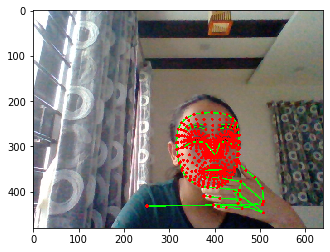

In [11]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [12]:
len(results.pose_landmarks.landmark)

33

In [13]:
pose=[]

for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [18]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [22]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(132)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [23]:
result_test = extract_keypoints(results)

In [36]:
np.save('0', result_test)

In [37]:
np.load('0.npy')

array([0., 0., 0., ..., 0., 0., 0.])

In [38]:
DATA_PATH = os.path.join('MP_Data')
actions = np.array(['hello', 'thanks', 'iloveyou'])
no_sequences = 30
sequence_length = 30


In [39]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [40]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)
                
                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()


In [96]:
cap.release()
cv2.destroyAllWindows()

In [42]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [43]:
label_map = {label:num for num, label in enumerate(actions)}

In [44]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [45]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [47]:
np.array(sequences).shape

(90, 30, 1662)

In [48]:
np.array(labels).shape

(90,)

In [50]:
X = np.array(sequences)

In [51]:
X.shape

(90, 30, 1662)

In [53]:
y = to_categorical(labels).astype(int)

In [54]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [59]:
y_train.shape

(85, 3)

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [62]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [71]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation = 'relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation = 'relu'))
model.add(LSTM(64, return_sequences=False, activation = 'relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [72]:
res = [0.7, 0.2, 0.1]

In [73]:
actions[np.argmax(res)]

'hello'

In [74]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [75]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 6s 440ms/step - loss: 1.9225 - categorical_accuracy: 0.2721
Epoch 2/2000
3/3 [==============================] - 0s 136ms/step - loss: 3.3239 - categorical_accuracy: 0.4500
Epoch 3/2000
3/3 [==============================] - 0s 105ms/step - loss: 3.6222 - categorical_accuracy: 0.4404
Epoch 4/2000
3/3 [==============================] - 0s 103ms/step - loss: 4.0671 - categorical_accuracy: 0.5695
Epoch 5/2000
3/3 [==============================] - 0s 99ms/step - loss: 6.0569 - categorical_accuracy: 0.4011
Epoch 6/2000
3/3 [==============================] - 0s 96ms/step - loss: 9.8925 - categorical_accuracy: 0.3580
Epoch 7/2000
3/3 [==============================] - 0s 102ms/step - loss: 11.2630 - categorical_accuracy: 0.3639
Epoch 8/2000
3/3 [==============================] - 0s 100ms/step - loss: 10.9682 - categorical_accuracy: 0.3074
Epoch 9/2000
3/3 [==============================] - 0s 95ms/step - loss: 18.1646 - categorical_accuracy:

3/3 [==============================] - 0s 80ms/step - loss: 1.5400 - categorical_accuracy: 0.3425
Epoch 74/2000
3/3 [==============================] - 0s 76ms/step - loss: 1.4737 - categorical_accuracy: 0.1996
Epoch 75/2000
3/3 [==============================] - 0s 75ms/step - loss: 1.5887 - categorical_accuracy: 0.1507
Epoch 76/2000
3/3 [==============================] - 0s 80ms/step - loss: 1.2495 - categorical_accuracy: 0.2818
Epoch 77/2000
3/3 [==============================] - 0s 79ms/step - loss: 1.3306 - categorical_accuracy: 0.3170
Epoch 78/2000
3/3 [==============================] - 0s 76ms/step - loss: 2.9201 - categorical_accuracy: 0.2623
Epoch 79/2000
3/3 [==============================] - 0s 76ms/step - loss: 1.6204 - categorical_accuracy: 0.3953
Epoch 80/2000
3/3 [==============================] - 0s 79ms/step - loss: 3.4700 - categorical_accuracy: 0.3718
Epoch 81/2000
3/3 [==============================] - 0s 78ms/step - loss: 2.8181 - categorical_accuracy: 0.3738
Epoch 

3/3 [==============================] - 0s 125ms/step - loss: 0.9711 - categorical_accuracy: 0.5302
Epoch 146/2000
3/3 [==============================] - 0s 129ms/step - loss: 0.9960 - categorical_accuracy: 0.4207
Epoch 147/2000
3/3 [==============================] - 0s 126ms/step - loss: 0.9185 - categorical_accuracy: 0.4834
Epoch 148/2000
3/3 [==============================] - 0s 124ms/step - loss: 0.8348 - categorical_accuracy: 0.5949
Epoch 149/2000
3/3 [==============================] - 0s 120ms/step - loss: 0.7578 - categorical_accuracy: 0.6203
Epoch 150/2000
3/3 [==============================] - 0s 112ms/step - loss: 0.7395 - categorical_accuracy: 0.5538
Epoch 151/2000
3/3 [==============================] - 0s 112ms/step - loss: 0.7748 - categorical_accuracy: 0.5538
Epoch 152/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.7061 - categorical_accuracy: 0.6398
Epoch 153/2000
3/3 [==============================] - 0s 101ms/step - loss: 0.6983 - categorical_accura

3/3 [==============================] - 0s 83ms/step - loss: 1.1023 - categorical_accuracy: 0.3738
Epoch 217/2000
3/3 [==============================] - 0s 89ms/step - loss: 1.0861 - categorical_accuracy: 0.3777
Epoch 218/2000
3/3 [==============================] - 0s 84ms/step - loss: 1.1063 - categorical_accuracy: 0.3894
Epoch 219/2000
3/3 [==============================] - 0s 78ms/step - loss: 1.1673 - categorical_accuracy: 0.2486
Epoch 220/2000
3/3 [==============================] - 0s 99ms/step - loss: 1.2688 - categorical_accuracy: 0.4207
Epoch 221/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.1591 - categorical_accuracy: 0.4208
Epoch 222/2000
3/3 [==============================] - 0s 84ms/step - loss: 1.2349 - categorical_accuracy: 0.3405
Epoch 223/2000
3/3 [==============================] - 0s 88ms/step - loss: 1.3012 - categorical_accuracy: 0.3366
Epoch 224/2000
3/3 [==============================] - 0s 84ms/step - loss: 1.1686 - categorical_accuracy: 0.340

3/3 [==============================] - 0s 74ms/step - loss: 0.7316 - categorical_accuracy: 0.8161
Epoch 289/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.6916 - categorical_accuracy: 0.8669
Epoch 290/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.6895 - categorical_accuracy: 0.7966
Epoch 291/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.7110 - categorical_accuracy: 0.8826
Epoch 292/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.7033 - categorical_accuracy: 0.8004
Epoch 293/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.6454 - categorical_accuracy: 0.8512
Epoch 294/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.6316 - categorical_accuracy: 0.8551
Epoch 295/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.6422 - categorical_accuracy: 0.7318
Epoch 296/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.6099 - categorical_accuracy: 0.829

3/3 [==============================] - 0s 78ms/step - loss: 0.1856 - categorical_accuracy: 0.9315
Epoch 361/2000
3/3 [==============================] - 0s 90ms/step - loss: 0.1456 - categorical_accuracy: 0.9491
Epoch 362/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.1799 - categorical_accuracy: 0.9354
Epoch 363/2000
3/3 [==============================] - 0s 82ms/step - loss: 0.1730 - categorical_accuracy: 0.9491
Epoch 364/2000
3/3 [==============================] - 0s 82ms/step - loss: 0.2930 - categorical_accuracy: 0.9100
Epoch 365/2000
3/3 [==============================] - 0s 82ms/step - loss: 0.2497 - categorical_accuracy: 0.8885
Epoch 366/2000
3/3 [==============================] - 0s 81ms/step - loss: 0.3108 - categorical_accuracy: 0.8708
Epoch 367/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.8755 - categorical_accuracy: 0.7025
Epoch 368/2000
3/3 [==============================] - 0s 81ms/step - loss: 0.9101 - categorical_accuracy: 0.624

3/3 [==============================] - 0s 82ms/step - loss: 0.8685 - categorical_accuracy: 0.5421
Epoch 433/2000
3/3 [==============================] - 0s 88ms/step - loss: 0.7798 - categorical_accuracy: 0.5793
Epoch 434/2000
3/3 [==============================] - 0s 96ms/step - loss: 0.6729 - categorical_accuracy: 0.6165
Epoch 435/2000
3/3 [==============================] - 0s 87ms/step - loss: 0.6376 - categorical_accuracy: 0.8415
Epoch 436/2000
3/3 [==============================] - 0s 85ms/step - loss: 0.6087 - categorical_accuracy: 0.8102
Epoch 437/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.5583 - categorical_accuracy: 0.8395
Epoch 438/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.5081 - categorical_accuracy: 0.8336
Epoch 439/2000
3/3 [==============================] - 0s 83ms/step - loss: 0.4313 - categorical_accuracy: 0.8826
Epoch 440/2000
3/3 [==============================] - 0s 81ms/step - loss: 0.4227 - categorical_accuracy: 0.867

3/3 [==============================] - 0s 78ms/step - loss: 0.0886 - categorical_accuracy: 0.9530
Epoch 505/2000
3/3 [==============================] - 0s 84ms/step - loss: 0.0785 - categorical_accuracy: 0.9667
Epoch 506/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.1347 - categorical_accuracy: 0.9550
Epoch 507/2000
3/3 [==============================] - 0s 82ms/step - loss: 0.0669 - categorical_accuracy: 0.9745
Epoch 508/2000
3/3 [==============================] - 0s 85ms/step - loss: 0.0899 - categorical_accuracy: 0.9824
Epoch 509/2000
3/3 [==============================] - 0s 82ms/step - loss: 0.0616 - categorical_accuracy: 0.9843 0s - loss: 0.0530 - categorical_accuracy: 0.
Epoch 510/2000
3/3 [==============================] - 0s 76ms/step - loss: 0.0729 - categorical_accuracy: 0.9706
Epoch 511/2000
3/3 [==============================] - 0s 76ms/step - loss: 0.0586 - categorical_accuracy: 0.9706
Epoch 512/2000
3/3 [==============================] - 0s 76ms/step

3/3 [==============================] - 0s 75ms/step - loss: 1.0926 - categorical_accuracy: 0.2446
Epoch 577/2000
3/3 [==============================] - 0s 76ms/step - loss: 1.0473 - categorical_accuracy: 0.3561
Epoch 578/2000
3/3 [==============================] - 0s 75ms/step - loss: 1.0357 - categorical_accuracy: 0.5205
Epoch 579/2000
3/3 [==============================] - 0s 76ms/step - loss: 1.0550 - categorical_accuracy: 0.6419
Epoch 580/2000
3/3 [==============================] - 0s 77ms/step - loss: 1.0274 - categorical_accuracy: 0.5108
Epoch 581/2000
3/3 [==============================] - 0s 77ms/step - loss: 1.0096 - categorical_accuracy: 0.4971
Epoch 582/2000
3/3 [==============================] - 0s 72ms/step - loss: 1.0041 - categorical_accuracy: 0.5264
Epoch 583/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.9932 - categorical_accuracy: 0.4774
Epoch 584/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.9657 - categorical_accuracy: 0.643

3/3 [==============================] - 0s 76ms/step - loss: 0.4122 - categorical_accuracy: 0.7965
Epoch 649/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.3985 - categorical_accuracy: 0.8082
Epoch 650/2000
3/3 [==============================] - 0s 76ms/step - loss: 0.4226 - categorical_accuracy: 0.8591
Epoch 651/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.4144 - categorical_accuracy: 0.8258
Epoch 652/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.3776 - categorical_accuracy: 0.7984
Epoch 653/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.4290 - categorical_accuracy: 0.8963
Epoch 654/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.5179 - categorical_accuracy: 0.8063
Epoch 655/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.6796 - categorical_accuracy: 0.7104
Epoch 656/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.7626 - categorical_accuracy: 0.647

3/3 [==============================] - 0s 86ms/step - loss: 0.2209 - categorical_accuracy: 0.9413
Epoch 721/2000
3/3 [==============================] - 0s 101ms/step - loss: 0.2766 - categorical_accuracy: 0.8963
Epoch 722/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.4146 - categorical_accuracy: 0.7945
Epoch 723/2000
3/3 [==============================] - 0s 107ms/step - loss: 0.3603 - categorical_accuracy: 0.8650
Epoch 724/2000
3/3 [==============================] - 0s 134ms/step - loss: 0.2219 - categorical_accuracy: 0.9393
Epoch 725/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.2175 - categorical_accuracy: 0.9413
Epoch 726/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.2119 - categorical_accuracy: 0.9276
Epoch 727/2000
3/3 [==============================] - 0s 84ms/step - loss: 0.2069 - categorical_accuracy: 0.9335
Epoch 728/2000
3/3 [==============================] - 0s 87ms/step - loss: 0.2533 - categorical_accuracy: 0.

3/3 [==============================] - 0s 74ms/step - loss: 0.0955 - categorical_accuracy: 0.9687
Epoch 793/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.1100 - categorical_accuracy: 0.9550
Epoch 794/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.1055 - categorical_accuracy: 0.9530
Epoch 795/2000
3/3 [==============================] - 0s 82ms/step - loss: 0.1005 - categorical_accuracy: 0.9393
Epoch 796/2000
3/3 [==============================] - 0s 89ms/step - loss: 0.0970 - categorical_accuracy: 0.9706
Epoch 797/2000
3/3 [==============================] - 0s 84ms/step - loss: 0.0768 - categorical_accuracy: 0.9589
Epoch 798/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.1228 - categorical_accuracy: 0.9432
Epoch 799/2000
3/3 [==============================] - 0s 88ms/step - loss: 0.1312 - categorical_accuracy: 0.9315
Epoch 800/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.3038 - categorical_accuracy: 0.941

3/3 [==============================] - 0s 77ms/step - loss: 2.0949 - categorical_accuracy: 0.1683
Epoch 865/2000
3/3 [==============================] - 0s 76ms/step - loss: 1.3042 - categorical_accuracy: 0.1722
Epoch 866/2000
3/3 [==============================] - 0s 77ms/step - loss: 1.4628 - categorical_accuracy: 0.3151
Epoch 867/2000
3/3 [==============================] - 0s 81ms/step - loss: 1.2156 - categorical_accuracy: 0.3228
Epoch 868/2000
3/3 [==============================] - 0s 78ms/step - loss: 1.2712 - categorical_accuracy: 0.2525
Epoch 869/2000
3/3 [==============================] - 0s 77ms/step - loss: 1.1731 - categorical_accuracy: 0.2681
Epoch 870/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.1806 - categorical_accuracy: 0.5401
Epoch 871/2000
3/3 [==============================] - 0s 75ms/step - loss: 1.1163 - categorical_accuracy: 0.4834
Epoch 872/2000
3/3 [==============================] - 0s 75ms/step - loss: 1.0614 - categorical_accuracy: 0.489

3/3 [==============================] - 0s 80ms/step - loss: 0.1891 - categorical_accuracy: 0.9628
Epoch 937/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.2593 - categorical_accuracy: 0.9374
Epoch 938/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.1754 - categorical_accuracy: 0.9491
Epoch 939/2000
3/3 [==============================] - 0s 81ms/step - loss: 0.1764 - categorical_accuracy: 0.9511
Epoch 940/2000
3/3 [==============================] - 0s 81ms/step - loss: 0.1370 - categorical_accuracy: 0.9608
Epoch 941/2000
3/3 [==============================] - 0s 81ms/step - loss: 0.1462 - categorical_accuracy: 0.9648
Epoch 942/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.1116 - categorical_accuracy: 0.9511
Epoch 943/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.0777 - categorical_accuracy: 0.9726
Epoch 944/2000
3/3 [==============================] - 0s 76ms/step - loss: 0.1071 - categorical_accuracy: 0.982

3/3 [==============================] - 0s 85ms/step - loss: 0.0163 - categorical_accuracy: 1.0000
Epoch 1009/2000
3/3 [==============================] - 0s 84ms/step - loss: 0.0130 - categorical_accuracy: 1.0000
Epoch 1010/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.0139 - categorical_accuracy: 1.0000
Epoch 1011/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.0092 - categorical_accuracy: 1.0000
Epoch 1012/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.0105 - categorical_accuracy: 1.0000
Epoch 1013/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.0102 - categorical_accuracy: 1.0000
Epoch 1014/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.0138 - categorical_accuracy: 1.0000
Epoch 1015/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.0115 - categorical_accuracy: 1.0000
Epoch 1016/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.0097 - categorical_accurac

3/3 [==============================] - 0s 83ms/step - loss: 1.2132 - categorical_accuracy: 0.1801
Epoch 1080/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.9899 - categorical_accuracy: 0.3386
Epoch 1081/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.9596 - categorical_accuracy: 0.4990
Epoch 1082/2000
3/3 [==============================] - 0s 79ms/step - loss: 1.0128 - categorical_accuracy: 0.4108
Epoch 1083/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.0654 - categorical_accuracy: 0.2994
Epoch 1084/2000
3/3 [==============================] - 0s 89ms/step - loss: 1.0683 - categorical_accuracy: 0.3426
Epoch 1085/2000
3/3 [==============================] - 0s 77ms/step - loss: 1.0112 - categorical_accuracy: 0.4520
Epoch 1086/2000
3/3 [==============================] - 0s 76ms/step - loss: 1.0053 - categorical_accuracy: 0.4599
Epoch 1087/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.9733 - categorical_accurac

Epoch 1151/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.6266 - categorical_accuracy: 0.7788
Epoch 1152/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.6525 - categorical_accuracy: 0.7514
Epoch 1153/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.6574 - categorical_accuracy: 0.7085
Epoch 1154/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.6435 - categorical_accuracy: 0.7339
Epoch 1155/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.6278 - categorical_accuracy: 0.7710
Epoch 1156/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.6387 - categorical_accuracy: 0.7476
Epoch 1157/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.6210 - categorical_accuracy: 0.7632
Epoch 1158/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.6387 - categorical_accuracy: 0.7593
Epoch 1159/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.6602 - cat

3/3 [==============================] - 0s 78ms/step - loss: 0.3951 - categorical_accuracy: 0.8591
Epoch 1223/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.4912 - categorical_accuracy: 0.7945
Epoch 1224/2000
3/3 [==============================] - 0s 83ms/step - loss: 0.4590 - categorical_accuracy: 0.8122
Epoch 1225/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.4059 - categorical_accuracy: 0.8473
Epoch 1226/2000
3/3 [==============================] - 0s 85ms/step - loss: 0.4327 - categorical_accuracy: 0.7984
Epoch 1227/2000
3/3 [==============================] - 0s 86ms/step - loss: 0.4870 - categorical_accuracy: 0.7906
Epoch 1228/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.4028 - categorical_accuracy: 0.8727
Epoch 1229/2000
3/3 [==============================] - 0s 85ms/step - loss: 0.4280 - categorical_accuracy: 0.7945
Epoch 1230/2000
3/3 [==============================] - 0s 87ms/step - loss: 0.4498 - categorical_accurac

Epoch 1294/2000
3/3 [==============================] - 0s 76ms/step - loss: 0.3394 - categorical_accuracy: 0.8727
Epoch 1295/2000
3/3 [==============================] - 0s 100ms/step - loss: 0.4116 - categorical_accuracy: 0.7985
Epoch 1296/2000
3/3 [==============================] - 0s 100ms/step - loss: 0.4123 - categorical_accuracy: 0.8435
Epoch 1297/2000
3/3 [==============================] - 0s 106ms/step - loss: 0.3846 - categorical_accuracy: 0.8356
Epoch 1298/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.3751 - categorical_accuracy: 0.8356
Epoch 1299/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.3838 - categorical_accuracy: 0.8395
Epoch 1300/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.4170 - categorical_accuracy: 0.8122
Epoch 1301/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.3925 - categorical_accuracy: 0.8337
Epoch 1302/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.3848 - 

3/3 [==============================] - 0s 80ms/step - loss: 0.2729 - categorical_accuracy: 0.8787
Epoch 1366/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.2658 - categorical_accuracy: 0.8943
Epoch 1367/2000
3/3 [==============================] - 0s 88ms/step - loss: 0.2400 - categorical_accuracy: 0.8884
Epoch 1368/2000
3/3 [==============================] - 0s 90ms/step - loss: 0.2517 - categorical_accuracy: 0.9080
Epoch 1369/2000
3/3 [==============================] - 0s 112ms/step - loss: 0.2872 - categorical_accuracy: 0.8670
Epoch 1370/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.2628 - categorical_accuracy: 0.8806
Epoch 1371/2000
3/3 [==============================] - 0s 92ms/step - loss: 0.2711 - categorical_accuracy: 0.8982
Epoch 1372/2000
3/3 [==============================] - 0s 82ms/step - loss: 0.2560 - categorical_accuracy: 0.9022
Epoch 1373/2000
3/3 [==============================] - 0s 85ms/step - loss: 0.2331 - categorical_accura

Epoch 1436/2000
3/3 [==============================] - 0s 82ms/step - loss: 0.2992 - categorical_accuracy: 0.8356
Epoch 1437/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.3008 - categorical_accuracy: 0.8591
Epoch 1438/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.2841 - categorical_accuracy: 0.8786
Epoch 1439/2000
3/3 [==============================] - 0s 81ms/step - loss: 0.2676 - categorical_accuracy: 0.8962
Epoch 1440/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.2742 - categorical_accuracy: 0.8806
Epoch 1441/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.2724 - categorical_accuracy: 0.8963
Epoch 1442/2000
3/3 [==============================] - 0s 81ms/step - loss: 0.2702 - categorical_accuracy: 0.8943
Epoch 1443/2000
3/3 [==============================] - 0s 83ms/step - loss: 0.2603 - categorical_accuracy: 0.8982
Epoch 1444/2000
3/3 [==============================] - 0s 89ms/step - loss: 0.2621 - cat

3/3 [==============================] - 0s 84ms/step - loss: 0.2121 - categorical_accuracy: 0.9236
Epoch 1508/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.2199 - categorical_accuracy: 0.8924
Epoch 1509/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.2356 - categorical_accuracy: 0.8924
Epoch 1510/2000
3/3 [==============================] - 0s 87ms/step - loss: 0.2406 - categorical_accuracy: 0.8846
Epoch 1511/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.2080 - categorical_accuracy: 0.8924
Epoch 1512/2000
3/3 [==============================] - 0s 81ms/step - loss: 0.2167 - categorical_accuracy: 0.8924
Epoch 1513/2000
3/3 [==============================] - 0s 81ms/step - loss: 0.2166 - categorical_accuracy: 0.8846
Epoch 1514/2000
3/3 [==============================] - 0s 86ms/step - loss: 0.1987 - categorical_accuracy: 0.9002 0s - loss: 0.1952 - categorical_accuracy: 0.
Epoch 1515/2000
3/3 [==============================] - 0s 9

3/3 [==============================] - 0s 94ms/step - loss: 0.2453 - categorical_accuracy: 0.8904
Epoch 1579/2000
3/3 [==============================] - 0s 103ms/step - loss: 0.2267 - categorical_accuracy: 0.8924
Epoch 1580/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.1978 - categorical_accuracy: 0.9080
Epoch 1581/2000
3/3 [==============================] - 0s 88ms/step - loss: 0.1907 - categorical_accuracy: 0.9041
Epoch 1582/2000
3/3 [==============================] - 0s 84ms/step - loss: 0.2061 - categorical_accuracy: 0.9139
Epoch 1583/2000
3/3 [==============================] - 0s 81ms/step - loss: 0.2095 - categorical_accuracy: 0.9100
Epoch 1584/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.1833 - categorical_accuracy: 0.9139
Epoch 1585/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.1935 - categorical_accuracy: 0.8963
Epoch 1586/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.1886 - categorical_accura

3/3 [==============================] - 0s 91ms/step - loss: 0.1537 - categorical_accuracy: 0.9159
Epoch 1650/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.1808 - categorical_accuracy: 0.8807
Epoch 1651/2000
3/3 [==============================] - 0s 96ms/step - loss: 0.1269 - categorical_accuracy: 0.9334
Epoch 1652/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.1418 - categorical_accuracy: 0.9178
Epoch 1653/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.1509 - categorical_accuracy: 0.9295
Epoch 1654/2000
3/3 [==============================] - 0s 89ms/step - loss: 0.1596 - categorical_accuracy: 0.9256
Epoch 1655/2000
3/3 [==============================] - 0s 90ms/step - loss: 0.1303 - categorical_accuracy: 0.9237
Epoch 1656/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.1371 - categorical_accuracy: 0.9178
Epoch 1657/2000
3/3 [==============================] - 0s 90ms/step - loss: 0.1291 - categorical_accurac

3/3 [==============================] - 0s 87ms/step - loss: 0.1907 - categorical_accuracy: 0.8924
Epoch 1721/2000
3/3 [==============================] - 0s 83ms/step - loss: 0.1877 - categorical_accuracy: 0.8983 0s - loss: 0.2065 - categorical_accuracy: 0.
Epoch 1722/2000
3/3 [==============================] - 0s 84ms/step - loss: 0.1561 - categorical_accuracy: 0.9276
Epoch 1723/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.1255 - categorical_accuracy: 0.9315
Epoch 1724/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.1491 - categorical_accuracy: 0.9237
Epoch 1725/2000
3/3 [==============================] - 0s 88ms/step - loss: 0.1425 - categorical_accuracy: 0.9237
Epoch 1726/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.1215 - categorical_accuracy: 0.9530
Epoch 1727/2000
3/3 [==============================] - 0s 82ms/step - loss: 0.1541 - categorical_accuracy: 0.9080
Epoch 1728/2000
3/3 [==============================] - 0s 7

3/3 [==============================] - 0s 83ms/step - loss: 0.1631 - categorical_accuracy: 0.9217
Epoch 1792/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.1432 - categorical_accuracy: 0.9472
Epoch 1793/2000
3/3 [==============================] - 0s 76ms/step - loss: 0.1406 - categorical_accuracy: 0.9237
Epoch 1794/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.1782 - categorical_accuracy: 0.9178
Epoch 1795/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.1295 - categorical_accuracy: 0.9354
Epoch 1796/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.1518 - categorical_accuracy: 0.9472
Epoch 1797/2000
3/3 [==============================] - 0s 76ms/step - loss: 0.1341 - categorical_accuracy: 0.9217
Epoch 1798/2000
3/3 [==============================] - 0s 76ms/step - loss: 0.1272 - categorical_accuracy: 0.9256
Epoch 1799/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.1260 - categorical_accurac

Epoch 1863/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.1876 - categorical_accuracy: 0.9432
Epoch 1864/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.1395 - categorical_accuracy: 0.9550
Epoch 1865/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.1518 - categorical_accuracy: 0.9080
Epoch 1866/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.0909 - categorical_accuracy: 0.9765
Epoch 1867/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.1412 - categorical_accuracy: 0.9217
Epoch 1868/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.1679 - categorical_accuracy: 0.9100
Epoch 1869/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.1104 - categorical_accuracy: 0.9608
Epoch 1870/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.1190 - categorical_accuracy: 0.9335
Epoch 1871/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.1211 - cat

3/3 [==============================] - 0s 79ms/step - loss: 0.0855 - categorical_accuracy: 0.9608
Epoch 1935/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.1124 - categorical_accuracy: 0.9374
Epoch 1936/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.1180 - categorical_accuracy: 0.9315
Epoch 1937/2000
3/3 [==============================] - 0s 76ms/step - loss: 0.0946 - categorical_accuracy: 0.9530
Epoch 1938/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.0928 - categorical_accuracy: 0.9784
Epoch 1939/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.1270 - categorical_accuracy: 0.9550
Epoch 1940/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.0992 - categorical_accuracy: 0.9804
Epoch 1941/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.1072 - categorical_accuracy: 0.9726
Epoch 1942/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.1021 - categorical_accurac

In [76]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 30, 64)            442112    
_________________________________________________________________
lstm_13 (LSTM)               (None, 30, 128)           98816     
_________________________________________________________________
lstm_14 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dense_9 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
________________________________________________

In [77]:
res = model.predict(X_test)

In [80]:
actions[np.argmax(res[4])]

'iloveyou'

In [82]:
actions[np.argmax(y_test[4])]

'hello'

In [83]:
model.save('action.h5')

In [84]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [90]:
yhat = model.predict(X_train)

In [91]:
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [92]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[57,  0],
        [ 1, 27]],

       [[54,  1],
        [ 0, 30]],

       [[58,  0],
        [ 0, 27]]], dtype=int64)

In [93]:
accuracy_score(ytrue, yhat)

0.9882352941176471

In [101]:
sequence = []
sentence = []
threshold = 0.7

cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()

        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        draw_styled_landmarks(image, results)
        
        keypoints = extract_keypoints(results)
        sequence.insert(0,keypoints)
        sequence = sequence[:30]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
        if res[np.argmax(res)] > threshold:
            if len(sentence) > 0:
                if actions[np.argmax(res)] != sentence[-1]:
                    sentence.append(actions[np.argmax(res)])
            else:
                sentence.append(actions[np.argmax(res)])
        if len(sentence) > 5:
            sentence = sentence[-5:] 
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30),
                  cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        
            
        cv2.imshow('OpenCV Feed', image)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.s

<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'me